In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
data = pd.read_excel(r'/Users/tinghaokao/Desktop/data/example_data_cleaning.xlsx')
data.head()

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,1,34982,2013.0,12900,Student,78,Low
1,2,34983,2015.0,1230,barmen,78,High
2,3,34984,1945.0,3450,student,78,Medium
3,4,34985,1923.0,5670,manager,78,Low
4,5,34986,1978.0,7890,hr,78,High


In [85]:
# sort the data by each column to find outliers and missing information
data.sort_values('TransactionID', ascending = True)
data.sort_values('ClientID', ascending = True)
data.sort_values('BirthYear', ascending = False)
data.sort_values('Amount', ascending = False)
data.head()

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,1,34982,2013.0,12900,Student,78,Low
1,2,34983,2015.0,1230,barmen,78,High
2,3,34984,1945.0,3450,student,78,Medium
3,4,34985,1923.0,5670,manager,78,Low
4,5,34986,1978.0,7890,hr,78,High


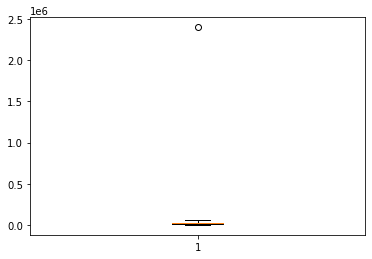

In [79]:
# use matplot to double check outliers in Amount column
plt.boxplot(data["Amount"])
plt.show()

In [80]:
# actions on data cleaning:

#1 drop redundant column "Department"
data_drop = data.drop(['Department'], axis = 1)
data_drop.head()

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.0,12900,Student,Low
1,2,34983,2015.0,1230,barmen,High
2,3,34984,1945.0,3450,student,Medium
3,4,34985,1923.0,5670,manager,Low
4,5,34986,1978.0,7890,hr,High


In [83]:
#2 replace the NaN in column "BirthYear" with matching values found using the same ClientID

data_drop.at[7, 'BirthYear'] = 1967
data_drop.at[8, 'BirthYear'] = 1999
data_drop.at[29, 'BirthYear'] = 1967
data_drop.head()

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.0,12900.0,Student,Low
1,2,34983,2015.0,1230.0,barmen,High
2,3,34984,1945.0,3450.0,student,Medium
3,4,34985,1923.0,5670.0,manager,Low
4,5,34986,1978.0,7890.0,hr,High


In [87]:
#3 replace the outlier value with the mean of the other values (without the outlier)

# remove the outlier value
data_drop['Amount'] = data_drop['Amount'].replace(2399090,np.nan)
data_drop

# replace the outlier value with the mean 
data_drop['Amount'] = data_drop['Amount'].replace(np.nan, data_drop['Amount'].mean())
data_drop.head()

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.0,12900.0,Student,Low
1,2,34983,2015.0,1230.0,barmen,High
2,3,34984,1945.0,3450.0,student,Medium
3,4,34985,1923.0,5670.0,manager,Low
4,5,34986,1978.0,7890.0,hr,High


In [91]:
#4 replace the NaN values with infromation found using the same Client ID

data_drop['Profession'] = data_drop['Profession'].replace(np.nan, 'bdm')
data_drop.head()

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.0,12900.0,Student,Low
1,2,34983,2015.0,1230.0,barmen,High
2,3,34984,1945.0,3450.0,student,Medium
3,4,34985,1923.0,5670.0,manager,Low
4,5,34986,1978.0,7890.0,hr,High


In [93]:
#5 save the cleaned dataset to csv

data_drop.to_csv(r'/Users/tinghaokao/Desktop/data/Lab_33_CleanedData.csv')